In [1]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people(
    min_faces_per_person=100, slice_=None
)
faces

{'data': array([[ 76.       ,  76.       ,  76.333336 , ...,  18.666666 ,
           3.       ,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ],
        ...,
        [222.33333  , 162.66667  ,  88.       , ...,   1.       ,
           0.       ,   0.       ],
        [  6.6666665,   7.       ,   7.       , ...,   8.       ,
           5.6666665,   5.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ]], dtype=float32),
 'images': array([[[ 76.        ,  76.        ,  76.333336  , ...,  64.666664  ,
           67.333336  ,  69.333336  ],
         [ 72.        ,  68.666664  ,  66.666664  , ...,  63.666668  ,
           65.        ,  67.333336  ],
         [ 66.        ,  61.666668  ,  58.333332  , ...,  64.        ,
           63.        ,  65.        ],
         .

In [4]:
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(
    faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2]
)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

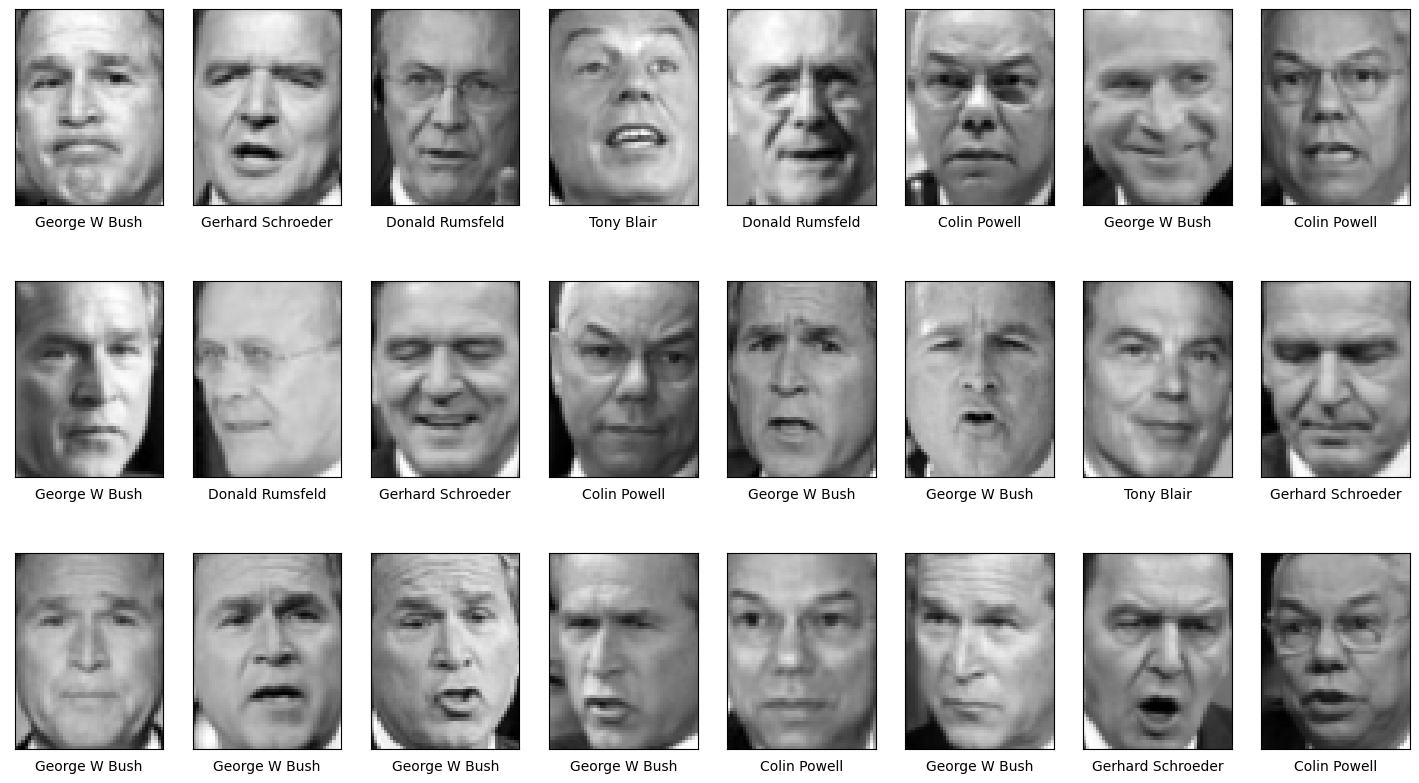

In [7]:
fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

<AxesSubplot:>

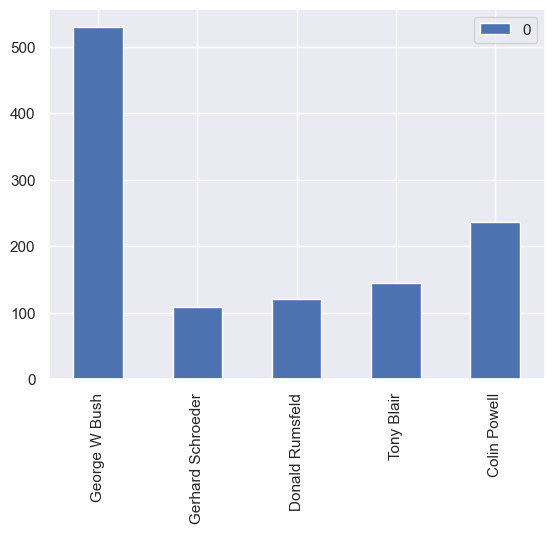

In [9]:
# check the balance in the dataset by generating a histogram
# showing how many facial images were imported for each person
import seaborn as sns
import pandas as pd
sns.set()

from collections import Counter
counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

In [10]:
# reduce the dataset to 100 images for each person
import numpy as np

mask = np.zeros(faces.target.shape, dtype=bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1

x = faces.data[mask]
y = faces.target[mask]
x.shape 

(500, 2914)

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='linear')

grid = {
    'C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(
    estimator=svc, param_grid=grid, cv=5, verbose=2
)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ...............................................C=10; total time=   0.1s
[CV] END ........................................

0.8400000000000001

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
svc = SVC(kernel='linear')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(
    estimator=pipe, param_grid=grid, cv=5, verbose=2
)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................svc__C=0.1; total time=   0.4s
[CV] END .........................................svc__C=0.1; total time=   0.3s
[CV] END .........................................svc__C=0.1; total time=   0.3s
[CV] END .........................................svc__C=0.1; total time=   0.3s
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.1s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ..........................................svc__C=10; total time=   0.2s
[CV] END ........................................

0.8560000000000001

In [13]:
grid_search.best_params_

{'svc__C': 0.1}

In [14]:
scaler = StandardScaler()
svc = SVC(kernel='poly')
pipe = make_pipeline(scaler, svc)
 
grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.01, 0.25, 0.5, 0.75, 1],
    'svc__degree': [1, 2, 3, 4, 5]
}
 
grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y) # Train the model with different parameter combinations
grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.3s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.4s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.3s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END ..........svc__C=0.1, svc__degree=1, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=0.1, svc__degree=1, 

0.8560000000000001

In [15]:
grid_search.best_params_

{'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.01}

In [16]:
scaler = StandardScaler()
svc = SVC(kernel='rbf')
pipe = make_pipeline(scaler, svc)
 
grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.01, 0.25, 0.5, 0.75, 1.0]
}
 
grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.6s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.5s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.5s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.5s
[CV] END .........................svc__C=0.1, svc__gamma=0.5; total time=   0.4s
[CV] END .........................svc__C=0.1, s

0.5

In [17]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,
                                                    stratify=y, random_state=0)

In [18]:
scaler = StandardScaler()
svc = SVC(kernel='linear', C=0.1)
pipe = make_pipeline(scaler, svc)
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [19]:
from sklearn.model_selection import cross_val_score
 
cross_val_score(pipe, x, y, cv=5).mean()

0.8560000000000001

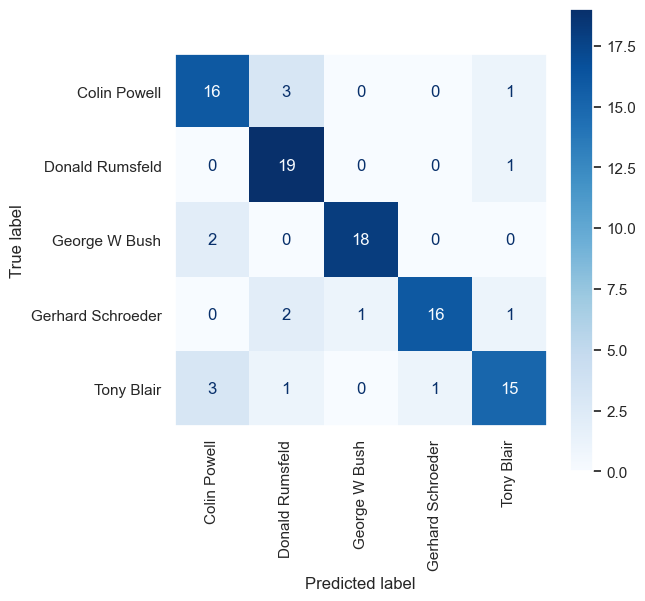

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)
cmd.from_estimator(pipe, x_test, y_test, display_labels=faces.target_names,
                   cmap='Blues', xticks_rotation='vertical', ax=ax)

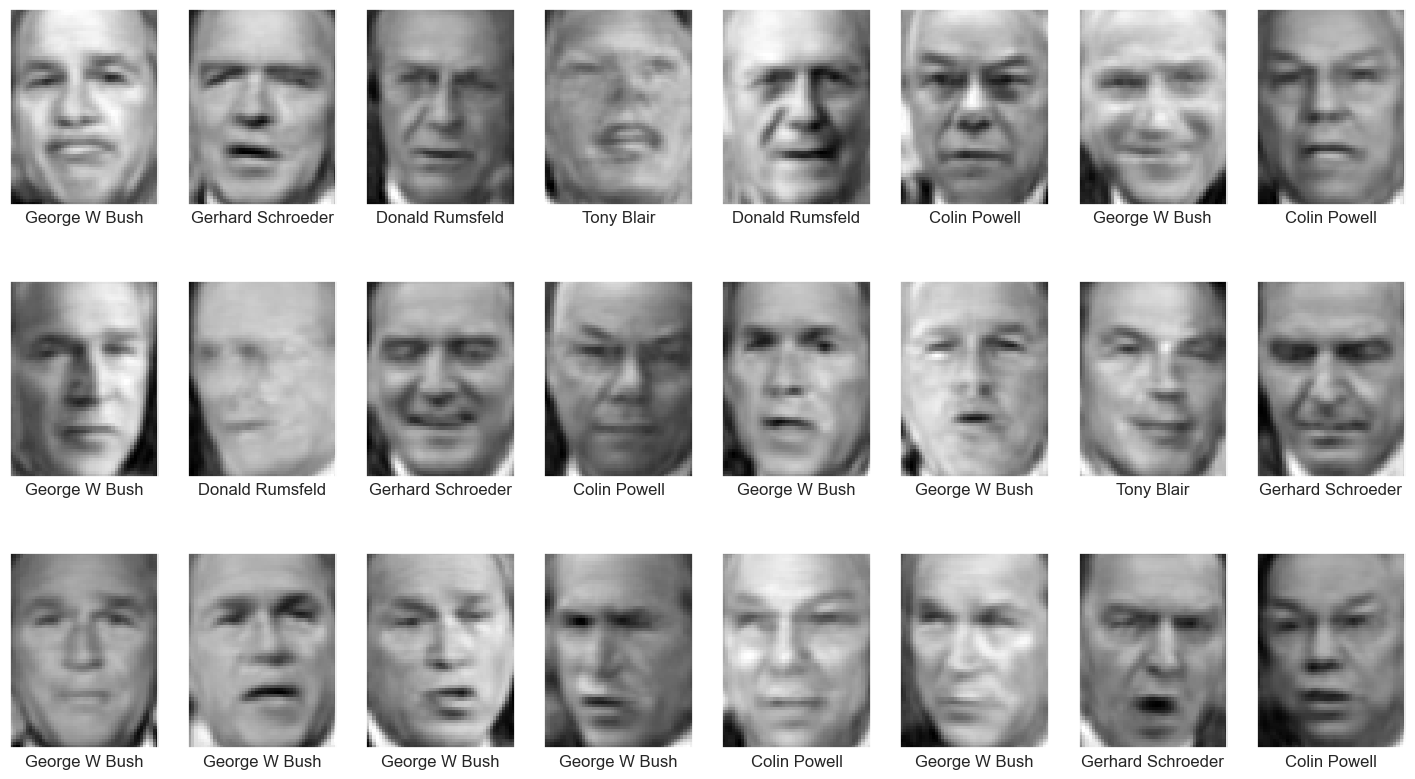

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, random_state=0)
pca_faces = pca.fit_transform(faces.data)
unpca_faces = pca.inverse_transform(pca_faces).reshape(1140, 62, 47)

fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

Text(0, 0.5, 'Explained Variance')

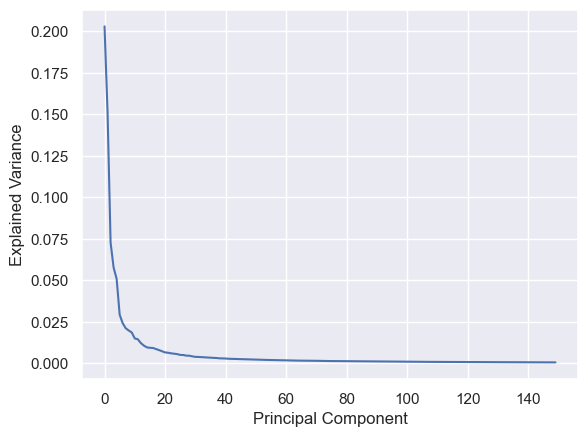

In [22]:
import seaborn as sns
sns.set()

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

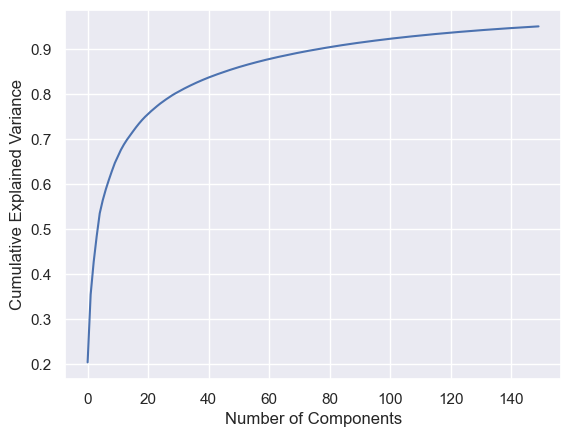

In [23]:
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

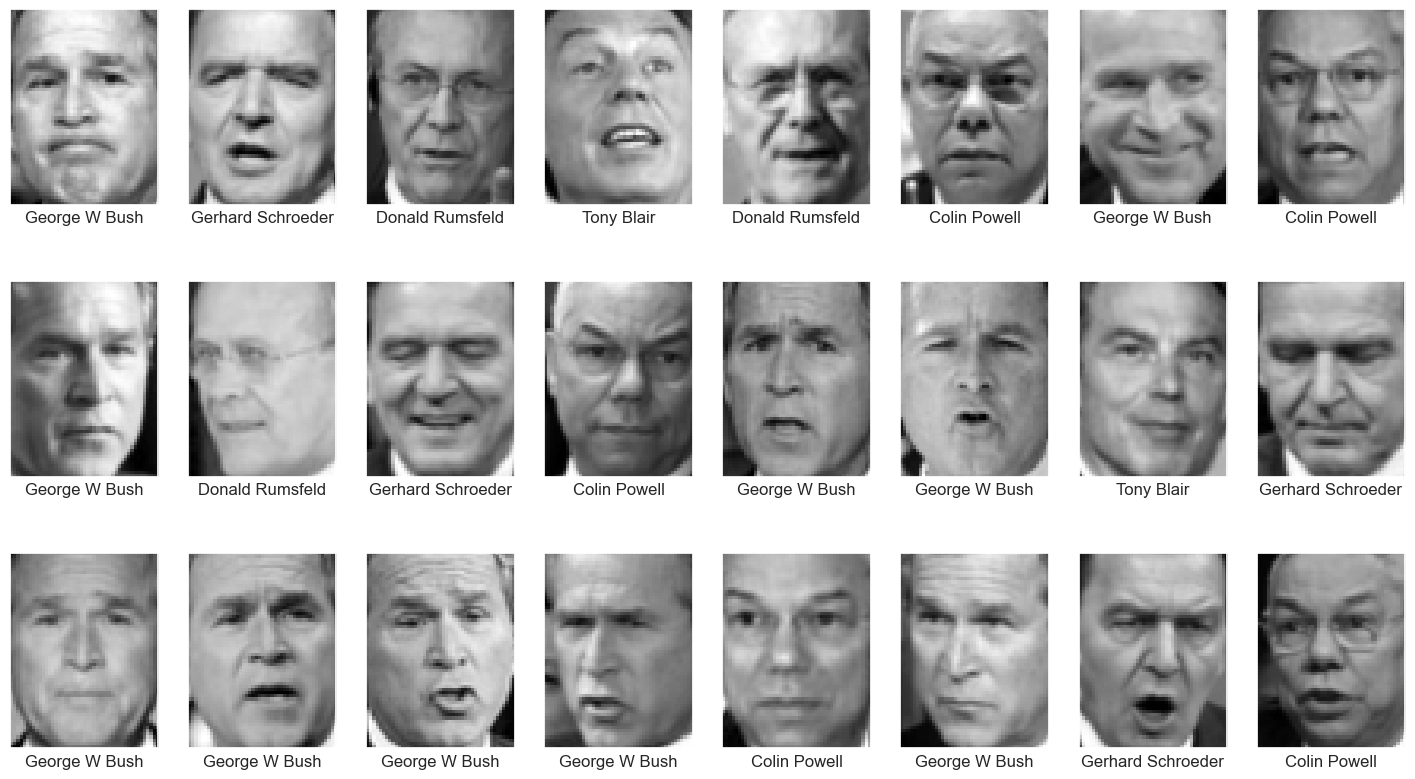

In [25]:
np.random.seed(0)
noisy_faces = np.random.normal(faces.data, 0.0765)

fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(noisy_faces[i].reshape(62, 47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [26]:
from sklearn.decomposition import PCA

pca = PCA(0.8, random_state=0)
pca_faces = pca.fit_transform(noisy_faces)
pca.n_components_

30

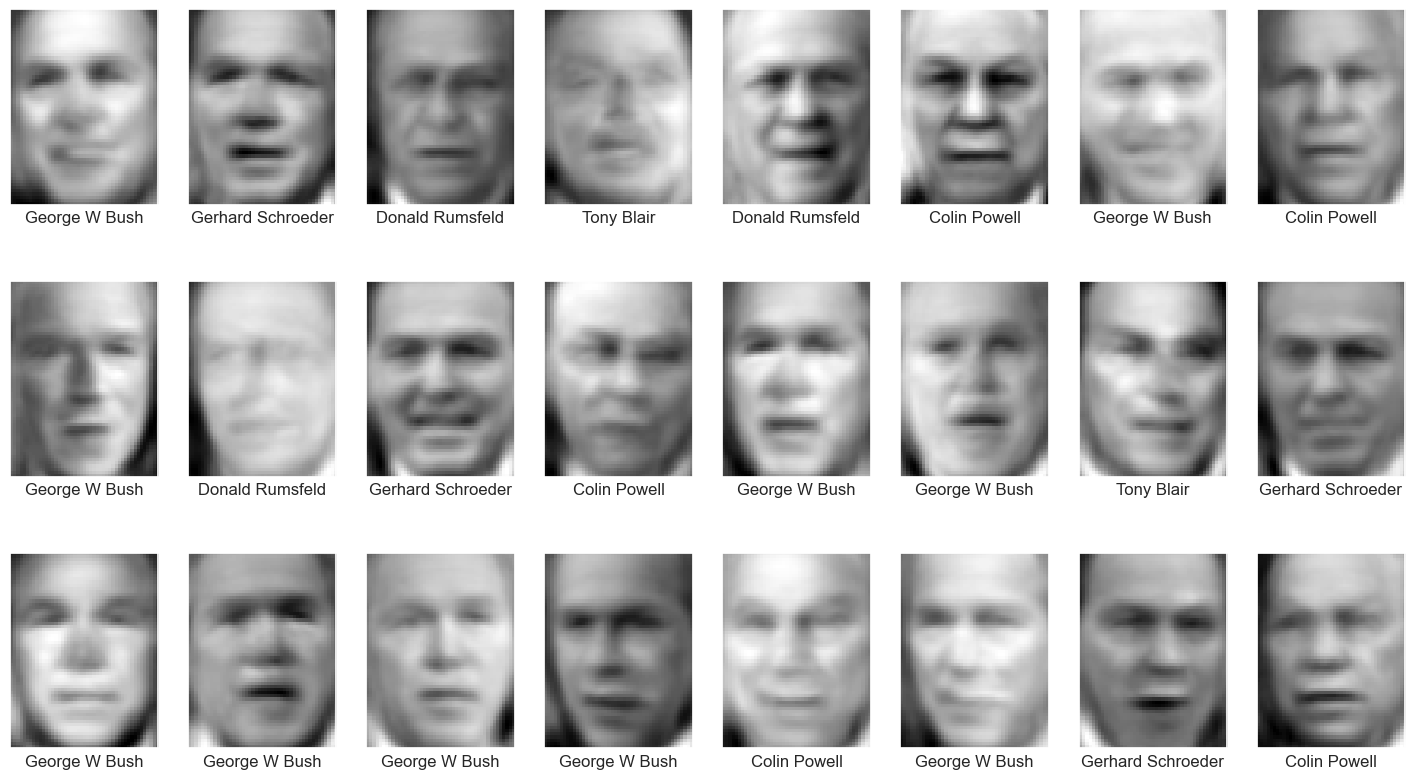

In [27]:
unpca_faces = pca.inverse_transform(pca_faces)

fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i].reshape(62, 47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])